<!-- Notebook title -->
# Convolutional Neural Networks

# 1. Notebook Description

### 1.1 Task Description
<!-- 
- A brief description of the problem you're solving with machine learning.
- Define the objective (e.g., classification, regression, clustering, etc.).
-->

#### Implement CNN

In this task, you are expected to implement a Convolutional Neural Network (CNN) using a high-level library, such as PyTorch. The classification task will focus on food categories.

##### Data Preparation
- **Dataset Categories:** The dataset contains 11 food categories:
  - Bread
  - Dairy Product
  - Dessert
  - Egg
  - Fried Food
  - Meat
  - Noodles/Pasta
  - Rice
  - Seafood
  - Soup
  - Vegetable/Fruit
- **Dataset Splitting:**
  - Split the dataset into training, validation, and test sets.
  - You may start with a subset of the dataset to expedite initial experiments.
- **Preprocessing Steps:**
  - Resize the images to a consistent size.
  - Normalize the image pixel values.
  - Apply data augmentation techniques to improve model robustness.

##### Implementing CNN Using a High-Level Library
- **Starting with Simple Architectures:**
  - Implement standard CNN architectures like LeNet or design a shallow custom CNN.
  - Train the model using hyperparameters such as:
    - Batch size
    - Learning rate
    - Number of epochs
  - Use optimization algorithms like Stochastic Gradient Descent (SGD) or Adam.
  
##### Experimenting with More Complex Architectures
- **Advanced Models:**
  - Experiment with deeper and more complex architectures such as:
    - VGG
    - ResNet
    - Custom CNN designs
- **Performance Comparison:**
  - Compare the performance of these advanced networks against simpler models.

##### Evaluation and Performance Metrics
- **Metrics:**
  - Accuracy
  - Precision
  - Recall
  - F1-Score
- **Analysis:**
  - Use a confusion matrix to identify food categories that are challenging to classify.

##### Comparing Results
- **Performance Comparison:**
  - Evaluate different CNN architectures in terms of:
    - Performance metrics
    - Training time
- **Impact of Model Complexity:**
  - Discuss how model complexity affects:
    - Accuracy
    - Training speed
    - Risk of overfitting
- **Architectural Decisions:**
  - Choose the network architecture thoughtfully, balancing performance and efficiency.

##### Final Requirements
- Train and validate all algorithms.
- Make any necessary assumptions as required to complete the task.

---

# 2. Setup

## 2.1 Imports
<!--
- Import necessary libraries (e.g., `numpy`, `pandas`, `matplotlib`, `scikit-learn`, etc.).
-->

In [1]:
from ikt450.src.common_imports import *
from ikt450.src.config import get_paths
from ikt450.src.common_func import load_dataset, save_dataframe, ensure_dir_exists

import torch
import torchvision
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## 2.2 Global Variables
<!--
- Define global constants, paths, and configuration settings used throughout the notebook.
-->

### 2.2.1 Paths

In [2]:
paths = get_paths()

### 2.2.3 Split ratio

In [3]:
SPLITRATIO = 0.8

In [4]:
paths

{'PATH_PROJECT_ROOT': '/home/jon/projects/ikt450',
 'PATH_ASSIGNMENTS': '/home/jon/projects/ikt450/assignments',
 'PATH_COMMON': '/home/jon/projects/ikt450/common',
 'PATH_COMMON_DATASETS': '/home/jon/projects/ikt450/common/datasets',
 'PATH_COMMON_NOTEBOOKS': '/home/jon/projects/ikt450/common/notebooks',
 'PATH_COMMON_RESOURCES': '/home/jon/projects/ikt450/common/resources',
 'PATH_COMMON_SCRIPTS': '/home/jon/projects/ikt450/common/scripts',
 'PATH_REPORTS': '/home/jon/projects/ikt450/reports',
 'PATH_SRC': '/home/jon/projects/ikt450/src',
 'PATH_1_KNN': '/home/jon/projects/ikt450/assignments/1_knn',
 'PATH_2_MLP': '/home/jon/projects/ikt450/assignments/2_mlp',
 'PATH_3_CNN': '/home/jon/projects/ikt450/assignments/3_cnn',
 'PATH_4_OBJECT_DETECTION': '/home/jon/projects/ikt450/assignments/4_object_detection',
 'PATH_5_RNN': '/home/jon/projects/ikt450/assignments/5_rnn',
 'PATH_6_ENCODER': '/home/jon/projects/ikt450/assignments/6_encoder'}

In [5]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset


In [6]:
# Load the dataset Food11 from PATH_COMMON_DATASETS/food11
# the folder structure is PATH_COMMON_DATASETS/food11/training and PATH_COMMON_DATASETS/food11/evaluation and PATH_COMMON_DATASETS/food11/validation
#  and in these folders there are 11 subfolders with the class names
#  and in these subfolders there are the images
#  the dataset is loaded with the torchvision.datasets.ImageFolder function
#  and the images are transformed to tensors and normalized


from torchvision import transforms
mean = [0.485, 0.456, 0.406]  # ImageNet mean
std = [0.229, 0.224, 0.225]   # ImageNet std


train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),        # Randomly crop the image to 224x224
    transforms.RandomHorizontalFlip(),        # Randomly flip the image horizontally
    transforms.RandomRotation(15),            # Randomly rotate the image by 15 degrees
    transforms.ColorJitter(                   # Randomly change brightness, contrast, saturation, and hue
        brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1
    ),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

test_transform = transforms.Compose([
    transforms.Resize(256),                   # Resize the shorter side to 256 pixels
    transforms.CenterCrop(224),               # Crop the center 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Resize((224, 224)),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_dataset = torchvision.datasets.ImageFolder(root=f"{paths['PATH_COMMON_DATASETS']}/food11/training" , transform=train_transform)
train_dataset
test_dataset = torchvision.datasets.ImageFolder(root=f"{paths['PATH_COMMON_DATASETS']}/food11/evaluation" , transform=test_transform)
test_dataset
val_dataset = torchvision.datasets.ImageFolder(root=f"{paths['PATH_COMMON_DATASETS']}/food11/validation" , transform=test_transform)
val_dataset

Dataset ImageFolder
    Number of datapoints: 3430
    Root location: /home/jon/projects/ikt450/common/datasets/food11/validation
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [7]:
# create data loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=6)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

## 2.3 Function Definitions
<!--
- Define helper functions that will be used multiple times in the notebook.
- Consider organizing these into separate sections (e.g., data processing functions, model evaluation functions).
-->

---

# 4. Data Processing

---

# 5. Model Development

## 5.1 Model Selection
<!--
- Choose the model(s) to be trained (e.g., linear regression, decision trees, neural networks).
-->

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        # First convolutional layer (input channels=3 for RGB, output channels=6, kernel size=5)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        
        # Second convolutional layer (input channels=6, output channels=16, kernel size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        
        # After two conv + pooling layers, the feature map size will be reduced.
        # For an input image of size 224x224, the final feature map size after conv and pooling is 53x53.
        # 16 * 53 * 53 = 44944 flattened features going into the first fully connected layer.
        self.fc1 = nn.Linear(16 * 53 * 53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 11)  # Output layer for classification (e.g., 10 classes)

    def forward(self, x):
        # First convolution, ReLU, and max-pooling layer
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)  # Output size: (6, 110, 110)
        
        # Second convolution, ReLU, and max-pooling layer
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2)  # Output size: (16, 53, 53)
        
        # Flatten the feature maps for the fully connected layers
        x = x.view(-1, 16 * 53 * 53)  # Reshape to (batch_size, 16 * 53 * 53)
        
        # Fully connected layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # Output layer (raw scores for classification)
        x = self.fc3(x)
        
        return x


## 5.2 Model Training
<!--
- Train the selected model(s) using the training data.
-->

In [9]:
model = LeNet()

model.to(device)
model
from torchsummary import summary


In [ ]:
# define the loss function and the optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01, momentum=0.9)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64*2, shuffle=True, num_workers=6)
n_epochs = 100


In [11]:
best_val_loss = float('inf')
best_model_scrach = None

for epoch in range(n_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    print(f"{epoch + 1} loss: {running_loss / len(train_loader)} val_loss: {val_loss / len(val_loader)}")
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_scrach  = model
        
    running_loss = 0.0

1 loss: 2.1891733970907 val_loss: 2.3793117293605097
2 loss: 2.0953752117024527 val_loss: 2.2461235920588174
3 loss: 2.0479498902956643 val_loss: 2.2521888702004045
4 loss: 2.0367575221591525 val_loss: 2.2371306684282093
5 loss: 2.0138923211230173 val_loss: 2.140375570014671
6 loss: 1.967878634730975 val_loss: 2.0764083001348705
7 loss: 1.9520463860697217 val_loss: 2.0254124027711375
8 loss: 1.9537100709146924 val_loss: 2.0915221903059216
9 loss: 1.937621338499917 val_loss: 2.0376191867722406
10 loss: 1.9111431936422985 val_loss: 1.9453144647456981
11 loss: 1.902096700337198 val_loss: 1.9891111817624834
12 loss: 1.8998846858739853 val_loss: 1.9556429893882186
13 loss: 1.8515193346473906 val_loss: 2.1271650305500738
14 loss: 1.8489468213584688 val_loss: 1.9787670638826158
15 loss: 1.8625114013751347 val_loss: 1.9038648539119296
16 loss: 1.8277175029118855 val_loss: 1.8801975934593766
17 loss: 1.8008244617117777 val_loss: 1.8987689713637035
18 loss: 1.8360953513118956 val_loss: 1.9827659

In [12]:
model = best_model_scrach

In [13]:
# evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, precision_score, recall_score
val_loss = 0.0
val_labels = []
val_preds = []

model.eval()
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        val_labels += labels.cpu().numpy().tolist()
        val_preds += preds.cpu().numpy().tolist()

print(f"Test loss: {val_loss / len(test_loader)}")
print(f"Test accuracy: {accuracy_score(val_labels, val_preds)}")
print(f"Test f1: {f1_score(val_labels, val_preds, average='macro')}")
print(f"Test precision: {precision_score(val_labels, val_preds, average='macro')}")
print(f"Test recall: {recall_score(val_labels, val_preds, average='macro')}")
print(classification_report(val_labels, val_preds, target_names=train_dataset.classes,digits=4))


Test loss: 1.5052246867485766
Test accuracy: 0.5085150881386317
Test f1: 0.4608697943905531
Test precision: 0.4540600505672483
Test recall: 0.5085889414336693
                 precision    recall  f1-score   support

          Bread     0.5169    0.2500    0.3370       368
  Dairy product     0.3973    0.1959    0.2624       148
        Dessert     0.3608    0.5160    0.4247       500
            Egg     0.4890    0.3970    0.4382       335
     Fried food     0.4869    0.5819    0.5302       287
           Meat     0.5288    0.7222    0.6106       432
  Noodles-Pasta     0.4847    0.7551    0.5904       147
           Rice     0.3445    0.7500    0.4721        96
        Seafood     0.0000    0.0000    0.0000       303
           Soup     0.7672    0.7380    0.7523       500
Vegetable-Fruit     0.6187    0.6883    0.6516       231

       accuracy                         0.5085      3347
      macro avg     0.4541    0.5086    0.4609      3347
   weighted avg     0.4757    0.5085    0

/home/jon/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jon/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jon/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jon/.local/lib/python3.10

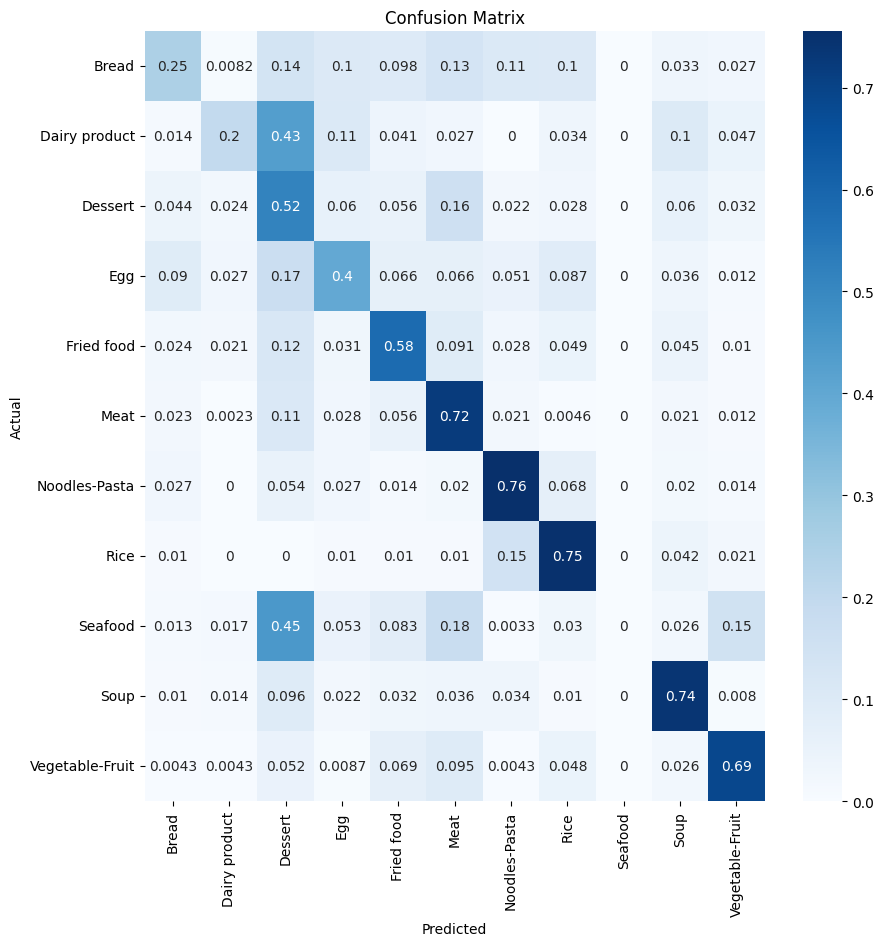

In [14]:
# plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(val_labels, val_preds, normalize='true')
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, xticklabels=train_dataset.classes, yticklabels=train_dataset.classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [15]:
# import resnet18
import torchvision.models as models
import torch
import torch.nn as nn
import torch.optim as optim
resnet18 = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1)
resnet18.fc = nn.Linear(resnet18.fc.in_features, 11)

# Freeze all layers # resnet18 = models.resnet101(weights=models.ResNet101_Weights.IMAGENET1K_V1)
#for param in resnet18.parameters():
#    param.requires_grad = False

# Unfreeze the final fully connected layer
#for param in resnet18.fc.parameters():
#    param.requires_grad = True

resnet18.to(device)
resnet18

criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64*2, shuffle=True, num_workers=6)
optimizer = optim.Adam(resnet18.parameters(), lr=0.0005)
#lr_scheduler = optim.lr_scheduler.StepLR(optimizer,step_size=5, gamma=0.1)
n_epochs = 70

In [16]:
best_val_loss = float('inf')
best_model = None


for epoch in range(n_epochs):
    running_loss = 0.0
    resnet18.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

      #  lr_scheduler.step()
        running_loss += loss.item()
    resnet18.eval()
    with torch.no_grad():
        val_loss = 0.0
        for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet18(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = resnet18
    print(f"{epoch + 1} loss: {running_loss / len(train_loader)} val_loss: {val_loss / len(val_loader)}")


1 loss: 1.0689710353811581 val_loss: 1.532998841163202
2 loss: 0.8009798410865996 val_loss: 0.9105311660440983
3 loss: 0.7765145343210962 val_loss: 0.8303877471221818
4 loss: 0.7295725444952647 val_loss: 0.7443641259645423
5 loss: 0.6429757531732321 val_loss: 0.7535936039768987
6 loss: 0.5953675992786884 val_loss: 0.6324998125157975
7 loss: 0.5573276728391647 val_loss: 0.678738855170431
8 loss: 0.5593175689379374 val_loss: 0.6380693863525435
9 loss: 0.5722542852163315 val_loss: 0.7552198942241914
10 loss: 0.5051864903006289 val_loss: 0.7492508804080663
11 loss: 0.49313576395312947 val_loss: 0.5726803647423232
12 loss: 0.5144034396443102 val_loss: 0.5949590500720121
13 loss: 0.48912398392955464 val_loss: 0.6974683512968046
14 loss: 0.4562590631345908 val_loss: 0.6386916433909425
15 loss: 0.4690429059167703 val_loss: 0.584989658591372
16 loss: 0.41279853507876396 val_loss: 0.5800409073492995
17 loss: 0.45234988547033733 val_loss: 0.5226397569532748
18 loss: 0.41423653231726754 val_loss: 

In [17]:
resnet18 = best_model   

In [18]:
# evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, precision_score, recall_score
val_loss = 0.0
val_labels = []
val_preds = []

resnet18.eval()
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        val_labels += labels.cpu().numpy().tolist()
        val_preds += preds.cpu().numpy().tolist()

print(f"Test loss: {val_loss / len(test_loader)}")
print(f"Test accuracy: {accuracy_score(val_labels, val_preds)}")
print(f"Test f1: {f1_score(val_labels, val_preds, average='macro')}")
print(f"Test precision: {precision_score(val_labels, val_preds, average='macro')}")
print(f"Test recall: {recall_score(val_labels, val_preds, average='macro')}")
print(classification_report(val_labels, val_preds, target_names=train_dataset.classes,digits=4))


Test loss: 0.46473372645702493
Test accuracy: 0.8840752913056469
Test f1: 0.8820772156737493
Test precision: 0.8829032936853765
Test recall: 0.8909684131496071
                 precision    recall  f1-score   support

          Bread     0.9048    0.8261    0.8636       368
  Dairy product     0.8392    0.8108    0.8247       148
        Dessert     0.8689    0.8220    0.8448       500
            Egg     0.7570    0.9672    0.8493       335
     Fried food     0.9185    0.8641    0.8905       287
           Meat     0.9182    0.9097    0.9140       432
  Noodles-Pasta     0.7725    0.9932    0.8690       147
           Rice     0.9293    0.9583    0.9436        96
        Seafood     0.9730    0.7129    0.8229       303
           Soup     0.9580    0.9580    0.9580       500
Vegetable-Fruit     0.8726    0.9784    0.9224       231

       accuracy                         0.8841      3347
      macro avg     0.8829    0.8910    0.8821      3347
   weighted avg     0.8914    0.8841    

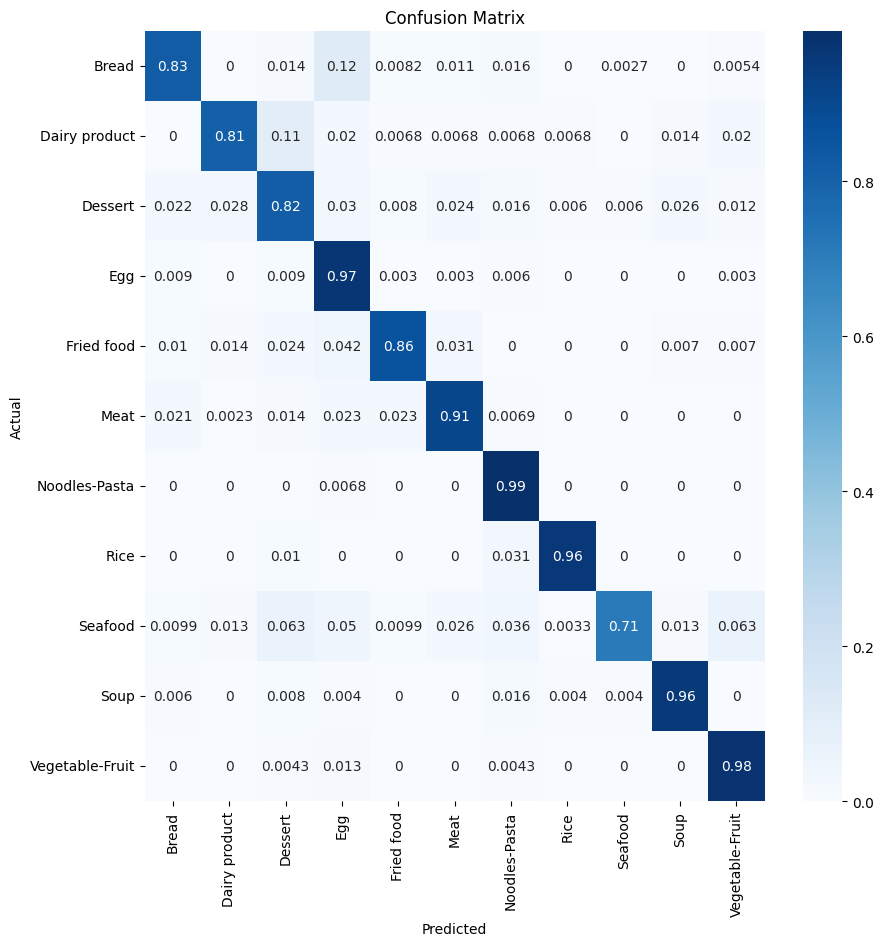

In [19]:
# plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(val_labels, val_preds, normalize='true')
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, xticklabels=train_dataset.classes, yticklabels=train_dataset.classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 5.3 Model Evaluation
<!--
- Evaluate model performance on validation data.
- Use appropriate metrics (e.g., accuracy, precision, recall, RMSE).
-->

## 5.4 Hyperparameter Tuning
<!--
- Fine-tune the model using techniques like Grid Search or Random Search.
- Evaluate the impact of different hyperparameters.
-->

## 5.5 Model Testing
<!--
- Evaluate the final model on the test dataset.
- Ensure that the model generalizes well to unseen data.
-->

## 5.6 Model Interpretation (Optional)
<!--
- Interpret the model results (e.g., feature importance, SHAP values).
- Discuss the strengths and limitations of the model.
-->

---

# 6. Predictions


## 6.1 Make Predictions
<!--
- Use the trained model to make predictions on new/unseen data.
-->

## 6.2 Save Model and Results
<!--
- Save the trained model to disk for future use.
- Export prediction results for further analysis.
-->

---

# 7. Documentation and Reporting

## 7.1 Summary of Findings
<!--
- Summarize the results and findings of the analysis.
-->

## 7.2 Next Steps
<!--
- Suggest further improvements, alternative models, or future work.
-->

## 7.3 References
<!--
- Cite any resources, papers, or documentation used.
-->